## Homework 2
*For any questions or concerns please email your instructor at `smanna@scu.edu`*
### Due - 05/04/2018 - 11:59p - 100 points

**Name:** `<Alma Niu>`

**Email** `<aniu@scu.edu>`

**Objectives:** The main aim of this homework is to make you conversant with `Perceptron Training Rule` and use it as a simple binary classifier.

**Submission Instructions:** 
* Please download `hw2.ipynb`, `train.csv`, and `test.csv` files and insert cells in the `hw2.ipynb` to complete your homework and submit the same file to Camino under `Homework` $\rightarrow$ `hw2`.
* Please make sure you type your `Name` and `Email` on top of your submission file in the placeholder above. 

**Honor Code:** You are expected to complete the homework on your own. Solutions might exist elsewhere, but you are not allowed to copy them. 

### Problem Statement
You are given a dataset of different `Iris` flower species. The original [dataset](https://archive.ics.uci.edu/ml/datasets/iris) has detailed description of all the characteristics of the flowers. Please feel free to visit the original page to know more about the dataset. Your task is to develop a simple linear binary classifier using `perceptron training rule` and `delta rule using batch gradient descent` to categorize the flowers based on their species.

**Adaptation**: To make the dataset work for this *homework*, we have modified the original dataset. You can use `train.csv` to train the parameters of your model and then use `test.csv` to test your model on some unknown dataset.

**Evaluation**: We have set aside another dataset similar to `test.csv` which will not be disclosed to you. We will use that dataset to evaluate your algorithm. This is just to make sure that you do not have any hard-coded parameters in your code.

**Note**: Please make sure you have proper comments and explanation/justification of the steps you have coded. Please feel to add extra cells to complete all the `TODO` stubs. You are allowed to create your own utility functions to support your code.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [2]:
# Define headers since the dataset does not have any headers
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

In [3]:
# Import csv file into pandas dataframe'
# TODO
df = pd.read_csv('train.csv')
df.columns=col_names
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.551282,0.371795,0.153846,0.012821,1
1,0.628205,0.243590,0.435897,0.115385,1
2,0.628205,0.410256,0.166667,0.012821,1
3,0.628205,0.397436,0.141026,0.012821,1
4,0.820513,0.371795,0.653846,0.243590,0


In [4]:
# print first 10 rows of the training data
# TODO
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.551282,0.371795,0.153846,0.012821,1
1,0.628205,0.243590,0.435897,0.115385,1
2,0.628205,0.410256,0.166667,0.012821,1
3,0.628205,0.397436,0.141026,0.012821,1
4,0.820513,0.371795,0.653846,0.243590,0
5,0.782051,0.358974,0.538462,0.153846,1
6,0.628205,0.423077,0.192308,0.038462,1
7,0.730769,0.333333,0.512821,0.115385,1
8,0.910256,0.397436,0.756410,0.217949,0
9,0.910256,0.448718,0.769231,0.307692,0


In [5]:
# find the number of training data
# TODO
np.size(df,0) #0 means count row
   #np.size(df,1) output 5, counts total column features


111

In [6]:
# check the data types for each columns of your dataset
# TODO
print(df.sepal_length.dtype)
print (df.sepal_width.dtype)
print(df.petal_length.dtype)
print(df.petal_width.dtype)
print(df.species.dtype)

float64
float64
float64
float64
int64


In [7]:
# Separating features and store in X_train
# TODO
X_train=df.loc[:,'sepal_length':'petal_width'].as_matrix()
print(X_train)

[[0.551282  0.371795  0.153846  0.0128205]
 [0.628205  0.24359   0.435897  0.115385 ]
 [0.628205  0.410256  0.166667  0.0128205]
 [0.628205  0.397436  0.141026  0.0128205]
 [0.820513  0.371795  0.653846  0.24359  ]
 [0.782051  0.358974  0.538462  0.153846 ]
 [0.628205  0.423077  0.192308  0.0384615]
 [0.730769  0.333333  0.512821  0.115385 ]
 [0.910256  0.397436  0.75641   0.217949 ]
 [0.910256  0.448718  0.769231  0.307692 ]
 [0.717949  0.474359  0.205128  0.025641 ]
 [0.679487  0.487179  0.205128  0.0384615]
 [0.820513  0.371795  0.692308  0.217949 ]
 [0.653846  0.333333  0.487179  0.166667 ]
 [0.717949  0.346154  0.512821  0.153846 ]
 [0.692308  0.307692  0.5       0.153846 ]
 [0.846154  0.384615  0.551282  0.166667 ]
 [0.602564  0.423077  0.192308  0.0128205]
 [0.653846  0.423077  0.166667  0.0128205]
 [0.717949  0.307692  0.628205  0.24359  ]
 [0.602564  0.423077  0.230769  0.0128205]
 [0.807692  0.384615  0.692308  0.217949 ]
 [0.615385  0.384615  0.179487  0.       ]
 [0.615385 

In [8]:
# Assigning y_train (species) from the dataset
# TODO
y_train=df.loc[:,['species']].as_matrix()
print(y_train)

[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]


In [28]:
# find the number of y values in the training dataset
# TODO
len(y_train)

111

**Activation functions**: You have to implement two different activation functions, `sgn` and `sigmoid`.

In [9]:
# implementation of sign activation
def sgn(x): # i
    if x > 0:
        return 1
    return 0
# TODO

In [10]:
# implementation of sigmoid activation
def sigmoid(x):
    return 1/(1+np.exp(-x))
# TODO


**Training Rules**

In [11]:
# implementation of perceptron training algorithm
def PTR(x, y, num_iter, learning_rate, activation_func):
    # TODO
    W=np.zeros(4,np.float64) #equal number of features,initialize weight vector 
    b=np.zeros(1,np.float64) #0 error
    for t in range(num_iter):
        i=t%len(y)
        y_pred=activation_func(np.dot(W,x[i].T)+b) #work after evaluating dot product
        if y_pred!=y[i]:
            W=W + (learning_rate*(y[i]-y_pred)* x[i,:]) #put in activation func
            b=b + learning_rate* (y[i]-y_pred)
    return W,b
    #return W, b

In [12]:
# implementation of delta rule using batch gradient decent

#convert X_train and y_train to matrix first
def BGD(X_train, y_train, num_iter, learning_rate):
#     TODO

    W=np.ones(X_train.shape[1])
    cost=np.zeros(num_iter)
    weights=np.ones(X_train.shape[1]) #weights
    b=0 #error
    for t in range(num_iter):
        O=X_train.dot(W) +b #cross multiply all features
        for i in range(len(O)):
            weights=weights+(learning_rate*(y_train[i]-O[i])*X_train[i]) #EQ1
            b=b+(learning_rate* (y_train[i]-O[i]))
            cost[t]=cost[t]+(y_train[i]-O[i])**2
    W=W+weights #EQ2
    return W,b,cost 
#    return W, b, cost 



In [39]:
# Learning parameters using Batch Gradient Descent for training
W_bgd, b_bgd, cost_bgd = BGD(X_train, y_train, 100, 0.01) # try out with different num_iterations, and learning_rate

#worked, need to set X_train & y_train as matrix form!

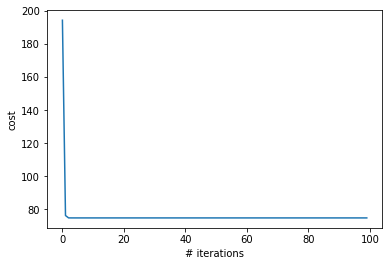

In [40]:
# plot cost (as computed in batch gradient descent)
# with `No. of iterations` in x-axis, and `Cost` in y-axis
# TODO
# plot the cost
plt.plot(cost_bgd)
plt.xlabel("# iterations")
plt.ylabel("cost")
plt.show()
#plotLearning2D(y_train, X_train, W_bgd, b_bgd) #adjust num interations to 100 for smooth curve

In [41]:
# Learning parameters using Perceptron training rule function
W_ptr, b_ptr = PTR(X_train, y_train, 2500, 0.01, sigmoid) # try out with different num_iterations, and learning_rate

**Prediction Begins**: I have provided you with two utility functions `Identity` and `predict` which you will need to use it on test data.

In [42]:
# An activation, that does nothing. Used to disable activation_function.
def Identity(x):
    return x

# The neural network thinks.
def predict(x_test, weights, bias, activation_func=Identity):
    return activation_func(np.dot(x_test, weights) + bias)

In [43]:
# Read test data into pandas dataframe
# TODO
df_test = pd.read_csv('test.csv')
df_test.columns=col_names


In [44]:
# print first 10 rows of the test data
# TODO
df_test.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.794872,0.307692,0.615385,0.179487,1
1,0.794872,0.282051,0.551282,0.153846,1
2,0.974359,0.474359,0.846154,0.269231,0
3,0.717949,0.358974,0.525641,0.153846,1
4,0.756410,0.333333,0.641026,0.192308,1
5,0.730769,0.320513,0.500000,0.141026,1
6,0.858974,0.371795,0.692308,0.256410,0
7,0.615385,0.294872,0.410256,0.115385,1
8,0.705128,0.346154,0.615385,0.243590,0
9,0.576923,0.384615,0.179487,0.012821,1


In [45]:
# features of test
# Separating feature and output columns from the dataset and store in X_test
# TODO
X_test=df_test.loc[:,'sepal_length':'petal_width'].as_matrix()
print(X_test)

[[0.794872  0.307692  0.615385  0.179487 ]
 [0.794872  0.282051  0.551282  0.153846 ]
 [0.974359  0.474359  0.846154  0.269231 ]
 [0.717949  0.358974  0.525641  0.153846 ]
 [0.75641   0.333333  0.641026  0.192308 ]
 [0.730769  0.320513  0.5       0.141026 ]
 [0.858974  0.371795  0.692308  0.25641  ]
 [0.615385  0.294872  0.410256  0.115385 ]
 [0.705128  0.346154  0.615385  0.24359  ]
 [0.576923  0.384615  0.179487  0.0128205]
 [0.705128  0.371795  0.512821  0.153846 ]
 [0.705128  0.307692  0.487179  0.128205 ]
 [0.871795  0.397436  0.717949  0.282051 ]
 [0.807692  0.397436  0.564103  0.179487 ]
 [0.935897  0.346154  0.769231  0.230769 ]
 [0.769231  0.371795  0.615385  0.217949 ]
 [0.641026  0.435897  0.166667  0.025641 ]
 [0.705128  0.333333  0.525641  0.153846 ]]


In [47]:
# store actual output (target) into y_test
# TODO
y_test=df_test.loc[:,['species']].as_matrix()
print(y_test)

[[1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]]


In [48]:
# Compute predictions with X_test
y_pred_ptr = predict(X_test, W_ptr, b_ptr, sigmoid) # feel free to explore results using `sgn` activation function
y_pred_bgd = predict(X_test, W_bgd, b_bgd)

**Evaluation Metrics** We will evaluate our predictions using `Root Mean Squared Error`

In [49]:
# Evaluate using RMSE
def RMSE(target, output):
    return math.sqrt(((target - output) ** 2).mean(axis=None))


In [50]:
rmse_ptr = RMSE(y_test, y_pred_ptr)
print('the rmse is: ', rmse_ptr)

('the rmse is: ', 0.47788783586090405)


In [51]:
rmse_bgd = RMSE(y_test, y_pred_bgd)
print('the rmse is: ', rmse_bgd)

('the rmse is: ', 17.000442411075863)
